In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
df.head(10)

,CATEGORY,MESSAGE,FILE_NAME
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a
1,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510
2,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978
4,1,This is the bottom line. If you can GIVE AWAY...,00033.9babb58d9298daa2963d4f514193d7d6
5,1,------=_NextPart_000_00B8_51E06B6A.C8586B31\n\...,00187.efd97ab2034b3384606e21db00014ecb
6,1,"<STYLE type=""text/css"">\n\n<!--\n\nP{\n\n fon...",00500.85b72f09f6778a085dc8b6821965a76f
7,1,<HR>\n\n<html>\n\n<head>\n\n <title>Secured I...,00493.1c5f59825f7a246187c137614fb1ea82
8,1,"<table width=""600"" border=""20"" align=""center"" ...",00012.381e4f512915109ba1e0853a7a8407b2
9,1,"<html>\n\n\n\n<head>\n\n<meta http-equiv=""Cont...",00487.139a2f4e8edbbdd64441536308169d74


In [3]:
df.isna().sum()

CATEGORY     0
MESSAGE      0
FILE_NAME    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CATEGORY   5796 non-null   int64 
 1   MESSAGE    5796 non-null   object
 2   FILE_NAME  5796 non-null   object
dtypes: int64(1), object(2)
memory usage: 136.0+ KB


In [5]:
df.CATEGORY.unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='CATEGORY', ylabel='count'>

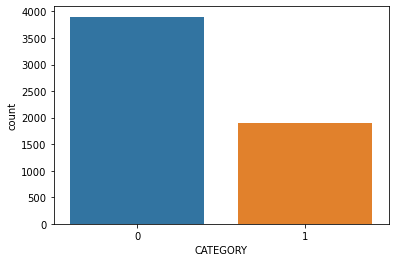

In [12]:
sns.countplot(x = df["CATEGORY"])

In [14]:
df["CATEGORY"].value_counts()

0    3900
1    1896
Name: CATEGORY, dtype: int64

## CLEANING TEXT

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['MESSAGE'])
y = df["CATEGORY"].values

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [70]:
LR = LogisticRegression().fit(X_train, y_train)
SVM = SVC().fit(X_train, y_train)
GNB = GaussianNB().fit(X_train.todense(), y_train)

In [74]:
LR_predict = LR.predict(X_test)
SVM_predict = SVM.predict(X_test)
GNB_predict = GNB.predict(X_test.todense())
print('LR:\n', classification_report(LR_predict, y_test))
print('SVM:\n', classification_report(SVM_predict, y_test))
print('GNB:\n', classification_report(GNB_predict, y_test))

LR:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       821
           1       0.92      0.99      0.95       339

    accuracy                           0.97      1160
   macro avg       0.96      0.98      0.97      1160
weighted avg       0.97      0.97      0.97      1160

SVM:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       811
           1       0.95      0.99      0.97       349

    accuracy                           0.98      1160
   macro avg       0.97      0.98      0.98      1160
weighted avg       0.98      0.98      0.98      1160

GNB:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96       836
           1       0.86      0.97      0.91       324

    accuracy                           0.95      1160
   macro avg       0.93      0.95      0.94      1160
weighted avg       0.95      0.95      0.95      1160

